In [2]:
import numpy as np
import pandas as pd

In [3]:
resource=pd.read_csv('RAWDATA/test_set_2_3ap.csv')


In [4]:
resource.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   test_id                      87 non-null     int64  
 1   test_dur                     87 non-null     int64  
 2   loc_id                       87 non-null     object 
 3   protocol                     87 non-null     object 
 4   pkt_len                      87 non-null     int64  
 5   bss_id                       87 non-null     int64  
 6   ap_name                      87 non-null     object 
 7   ap_mac                       87 non-null     object 
 8   ap_id                        87 non-null     object 
 9   pd                           87 non-null     int64  
 10  ed                           87 non-null     int64  
 11  nav                          87 non-null     int64  
 12  eirp                         87 non-null     int64  
 13  ap_from_ap_0_sum_ant_r

In [5]:
columns=[0,1,2,4,6,7,8,12,22,23,25,26,28,29,31,32,34,35,37,38,40,41,47,48,49,50,52,53,54,55] #这里没删bss_id，为了后续合并空白值计算
resource=resource.drop(resource.columns[columns],axis=1)
resource.index=range(resource.shape[0])

In [5]:
# resource.to_excel('temp.xlsx')

In [6]:
#删除指定有空值的行
resource.index=range(resource.shape[0])

In [7]:
# resource.to_excel('temp.xlsx')

In [7]:
resource.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   protocol                    87 non-null     object 
 1   bss_id                      87 non-null     int64  
 2   pd                          87 non-null     int64  
 3   ed                          87 non-null     int64  
 4   nav                         87 non-null     int64  
 5   ap_from_ap_0_sum_ant_rssi   58 non-null     object 
 6   ap_from_ap_0_max_ant_rssi   58 non-null     object 
 7   ap_from_ap_0_mean_ant_rssi  58 non-null     object 
 8   ap_from_ap_1_sum_ant_rssi   58 non-null     object 
 9   ap_from_ap_1_max_ant_rssi   58 non-null     object 
 10  ap_from_ap_1_mean_ant_rssi  58 non-null     object 
 11  ap_from_ap_2_sum_ant_rssi   58 non-null     object 
 12  ap_from_ap_2_max_ant_rssi   58 non-null     object 
 13  ap_from_ap_2_mean_ant_rssi  58 non-nu

In [8]:
for i in range(resource.shape[0]):
    if resource.iloc[i,list(resource.columns).index('bss_id')]==2:
        continue
    else: 
        if resource.iloc[i,list(resource.columns).index('bss_id')]==0:
            resource.iloc[i,list(resource.columns).index('ap_from_ap_0_sum_ant_rssi')]=resource.iloc[i,list(resource.columns).index('ap_from_ap_1_sum_ant_rssi')]
            resource.iloc[i,list(resource.columns).index('ap_from_ap_0_max_ant_rssi')]=resource.iloc[i,list(resource.columns).index('ap_from_ap_1_max_ant_rssi')]
            resource.iloc[i,list(resource.columns).index('ap_from_ap_0_mean_ant_rssi')]=resource.iloc[i,list(resource.columns).index('ap_from_ap_1_mean_ant_rssi')]
            resource.iloc[i,list(resource.columns).index('sta_from_sta_0_rssi')]=resource.iloc[i,list(resource.columns).index('sta_from_sta_1_rssi')]
        resource.iloc[i,list(resource.columns).index('ap_from_ap_1_sum_ant_rssi')]=resource.iloc[i,list(resource.columns).index('ap_from_ap_2_sum_ant_rssi')]
        resource.iloc[i,list(resource.columns).index('ap_from_ap_1_max_ant_rssi')]=resource.iloc[i,list(resource.columns).index('ap_from_ap_2_max_ant_rssi')]
        resource.iloc[i,list(resource.columns).index('ap_from_ap_1_mean_ant_rssi')]=resource.iloc[i,list(resource.columns).index('ap_from_ap_2_mean_ant_rssi')]
        resource.iloc[i,list(resource.columns).index('sta_from_sta_1_rssi')]=resource.iloc[i,list(resource.columns).index('sta_from_sta_2_rssi')]

In [9]:
resource=resource.drop(['ap_from_ap_2_sum_ant_rssi',
                       'ap_from_ap_2_max_ant_rssi','ap_from_ap_2_mean_ant_rssi','sta_from_sta_2_rssi'],axis=1)

In [10]:
resource.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   protocol                    87 non-null     object 
 1   bss_id                      87 non-null     int64  
 2   pd                          87 non-null     int64  
 3   ed                          87 non-null     int64  
 4   nav                         87 non-null     int64  
 5   ap_from_ap_0_sum_ant_rssi   87 non-null     object 
 6   ap_from_ap_0_max_ant_rssi   87 non-null     object 
 7   ap_from_ap_0_mean_ant_rssi  87 non-null     object 
 8   ap_from_ap_1_sum_ant_rssi   87 non-null     object 
 9   ap_from_ap_1_max_ant_rssi   87 non-null     object 
 10  ap_from_ap_1_mean_ant_rssi  87 non-null     object 
 11  sta_to_ap_0_sum_ant_rssi    87 non-null     object 
 12  sta_to_ap_1_sum_ant_rssi    87 non-null     object 
 13  sta_to_ap_2_sum_ant_rssi    87 non-nu

In [11]:
# 定义管理rssi，并创造出新特征值
def cal_pd(apmax,pd):
    apmax = eval(apmax)
    comparison_result = [1 if x >= pd else 0 for x in apmax]
    proportion_of_ones = sum(comparison_result) / len(apmax)
    return proportion_of_ones

def cal_ed(apmax,ed):
    apmax = eval(apmax)
    comparison_result = [1 if x >= ed else 0 for x in apmax]
    proportion_of_ones = sum(comparison_result) / len(apmax)
    return proportion_of_ones

def cal_nav(apmean,nav):
    apmean = eval(apmean)
    comparison_result = [1 if x >= nav else 0 for x in apmean]

    # 计算 1 的占比
    proportion_of_ones = sum(comparison_result) / len(apmean)
    return proportion_of_ones    

In [12]:
resource['pro_pd_0'] = resource.apply(lambda row: cal_pd(row['ap_from_ap_0_max_ant_rssi'], row['pd']), axis=1)
resource['pro_ed_0'] = resource.apply(lambda row: cal_ed(row['ap_from_ap_0_max_ant_rssi'], row['ed']), axis=1)
resource['pro_nav_0'] = resource.apply(lambda row: cal_nav(row['ap_from_ap_0_mean_ant_rssi'], row['nav']), axis=1)

resource['pro_pd_1'] = resource.apply(lambda row: cal_pd(row['ap_from_ap_1_max_ant_rssi'], row['pd']), axis=1)
resource['pro_ed_1'] = resource.apply(lambda row: cal_ed(row['ap_from_ap_1_max_ant_rssi'], row['ed']), axis=1)
resource['pro_nav_1'] = resource.apply(lambda row: cal_nav(row['ap_from_ap_1_mean_ant_rssi'], row['nav']), axis=1)

In [13]:
drop_columns=['pd','ed','ap_from_ap_0_mean_ant_rssi','ap_from_ap_0_max_ant_rssi',
              'ap_from_ap_1_mean_ant_rssi','ap_from_ap_1_max_ant_rssi']

resource=resource.drop(drop_columns,axis=1)

In [14]:
resource.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   protocol                    87 non-null     object 
 1   bss_id                      87 non-null     int64  
 2   nav                         87 non-null     int64  
 3   ap_from_ap_0_sum_ant_rssi   87 non-null     object 
 4   ap_from_ap_1_sum_ant_rssi   87 non-null     object 
 5   sta_to_ap_0_sum_ant_rssi    87 non-null     object 
 6   sta_to_ap_1_sum_ant_rssi    87 non-null     object 
 7   sta_to_ap_2_sum_ant_rssi    87 non-null     object 
 8   sta_from_ap_0_sum_ant_rssi  87 non-null     object 
 9   sta_from_ap_1_sum_ant_rssi  87 non-null     object 
 10  sta_from_ap_2_sum_ant_rssi  87 non-null     object 
 11  sta_from_sta_0_rssi         87 non-null     float64
 12  sta_from_sta_1_rssi         87 non-null     float64
 13  nss                         0 non-nul

In [15]:
# 对RSSI求平均值处理
for i in range(3,11):
    resource.iloc[:,i]=resource.iloc[:,i].apply(lambda x: sum(eval(x))/len(eval(x)))

In [ ]:
# # pro_ed的分布情况

# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame and 'pro_ed' is the column of interest
# pro_ed = resource['pro_ed']

# # Calculate basic statistics
# max_value = pro_ed.max()
# min_value = pro_ed.min()
# mean_value = pro_ed.mean()
# std_dev = pro_ed.std()

# # Display basic statistics
# print(f"Max value: {max_value}")
# print(f"Min value: {min_value}")
# print(f"Mean value: {mean_value}")
# print(f"Standard Deviation: {std_dev}")

# # Plot a histogram to visualize the distribution of 'pro_ed'
# plt.figure(figsize=(8, 6))
# plt.hist(pro_ed, bins=10, color='skyblue', edgecolor='black')
# plt.title('Histogram of pro_ed')
# plt.xlabel('pro_ed values')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

In [16]:
resource.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   protocol                    87 non-null     object 
 1   bss_id                      87 non-null     int64  
 2   nav                         87 non-null     int64  
 3   ap_from_ap_0_sum_ant_rssi   87 non-null     object 
 4   ap_from_ap_1_sum_ant_rssi   87 non-null     object 
 5   sta_to_ap_0_sum_ant_rssi    87 non-null     object 
 6   sta_to_ap_1_sum_ant_rssi    87 non-null     object 
 7   sta_to_ap_2_sum_ant_rssi    87 non-null     object 
 8   sta_from_ap_0_sum_ant_rssi  87 non-null     object 
 9   sta_from_ap_1_sum_ant_rssi  87 non-null     object 
 10  sta_from_ap_2_sum_ant_rssi  87 non-null     object 
 11  sta_from_sta_0_rssi         87 non-null     float64
 12  sta_from_sta_1_rssi         87 non-null     float64
 13  nss                         0 non-nul

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

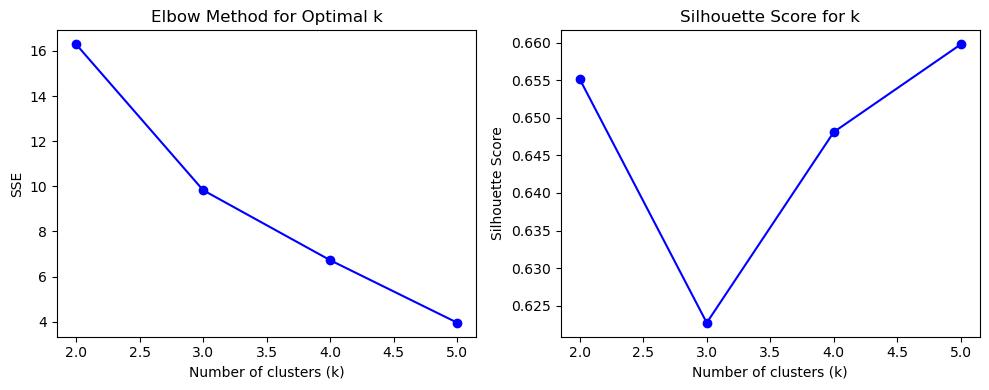

In [17]:
# 选择pro的聚类个数
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data_scaled=resource.iloc[:,range(16,22)]

# 确定最佳的聚类簇数，使用肘部法或轮廓系数
sse = []
silhouette_scores = []
K = range(2, 6)  # 假设我们要测试2到5个聚类数
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init='auto')
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)  # SSE
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# 绘制肘部法图像
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K, sse, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bo-')
plt.title('Silhouette Score for k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [ ]:
# import umap
# import matplotlib.pyplot as plt
# import numpy as np

# # 准备数据
# data =resource.iloc[:,range(33,39)]

# # 创建UMAP对象
# reducer = umap.UMAP(n_components=3)

# # 使用UMAP进行降维
# embedding = reducer.fit_transform(data)

# # 绘制结果
# plt.figure(figsize=(8, 8))
# plt.scatter(embedding[:, 0], embedding[:, 1], s=50, cmap='Spectral', alpha=0.6)
# plt.title('UMAP projection of the data')
# plt.show()


In [18]:
# 得到‘state’类别
# 0:大量同步
# 1：大量异步
# 2：混合

df=data_scaled
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(data_scaled)

# 查看每个簇的平均特征值
cluster_centers = pd.DataFrame(kmeans.cluster_centers_)
# columns=['pro_pd', 'pro_ed', 'pro_nav']

print(f"Cluster centers:\n{cluster_centers}")

# 查看每个簇的样本数量
print(df['cluster'].value_counts())

# # 可视化聚类结果
# plt.scatter(df['pro_nav'], df['pro_pd'], c=df['cluster'], cmap='viridis', label='Cluster')
# plt.colorbar()
# plt.xlabel('pro_nav')
# plt.ylabel('pro_pd')
# plt.title('KMeans Clustering of WLAN Communication States')
# plt.show()
# 3D plot of the clustering results
# fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot(111, projection='3d')

# # Plot the clusters in 3D
# scatter = ax.scatter(df['pro_nav'], df['pro_pd'], df['pro_ed'], c=df['cluster'], cmap='viridis')

# # Set labels and title
# ax.set_xlabel('pro_nav')
# ax.set_ylabel('pro_pd')
# ax.set_zlabel('pro_ed')
# ax.set_title('3D KMeans Clustering of WLAN Communication States')

# # Add a color bar
# plt.colorbar(scatter)

# plt.show()

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster centers:
          0         1         2         3         4         5
0  0.106239  0.003765  0.019275  0.201712  0.003185  0.054815
1  0.965036  0.003071  0.903755  0.855412  0.031996  0.832333
2  0.403678  0.004730  0.094012  0.972620  0.004553  0.708539
cluster
0    52
1    22
2    13
Name: count, dtype: int64


C:\Users\ShenFei\AppData\Local\Temp\ipykernel_17368\3777668285.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(data_scaled)


In [19]:
data_scaled['cluster'] = kmeans.fit_predict(data_scaled)
resource['state']=data_scaled['cluster']

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ShenFei\AppData\Local\Temp\ipykernel_17368\150325647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_scaled['cluster'] = kmeans.fit_predict(data_scaled)


In [20]:
resource.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   protocol                    87 non-null     object 
 1   bss_id                      87 non-null     int64  
 2   nav                         87 non-null     int64  
 3   ap_from_ap_0_sum_ant_rssi   87 non-null     object 
 4   ap_from_ap_1_sum_ant_rssi   87 non-null     object 
 5   sta_to_ap_0_sum_ant_rssi    87 non-null     object 
 6   sta_to_ap_1_sum_ant_rssi    87 non-null     object 
 7   sta_to_ap_2_sum_ant_rssi    87 non-null     object 
 8   sta_from_ap_0_sum_ant_rssi  87 non-null     object 
 9   sta_from_ap_1_sum_ant_rssi  87 non-null     object 
 10  sta_from_ap_2_sum_ant_rssi  87 non-null     object 
 11  sta_from_sta_0_rssi         87 non-null     float64
 12  sta_from_sta_1_rssi         87 non-null     float64
 13  nss                         0 non-nul

## SINR

In [21]:
def dbm_to_linear(dbm):
    return 10 ** (dbm / 10)

def linear_to_dbm(linear):
    return 10 * np.log10(linear)

def add_dbm(dbm1, dbm2):
    # 使用 NumPy 的广播功能直接进行计算
    linear1 = dbm_to_linear(dbm1)
    linear2 = dbm_to_linear(dbm2)
    
    # 将两个线性功率值相加
    total_linear = linear1 + linear2
    
    # 将相加后的线性功率值转换回DBM
    total_dbm = linear_to_dbm(total_linear)
    
    return total_dbm


def func(x, y, z, state):
    if state == 0:
        return x + 100
    else:
        return x - add_dbm(y,z)

    
# 创建一个新列来存储 SINR 计算的结果
sinr = []
df = resource
# 遍历 DataFrame 的每一行
for i in range(len(df)):
    if df.iloc[i, list(df.columns).index('bss_id')] == 2:  # 偶数行
        result = func(df.iloc[i, list(df.columns).index('sta_from_ap_2_sum_ant_rssi')],df.iloc[i, list(df.columns).index('sta_from_ap_1_sum_ant_rssi')], df.iloc[i, list(df.columns).index('sta_from_ap_0_sum_ant_rssi')],df.iloc[i, list(df.columns).index('state')])
    elif df.iloc[i, list(df.columns).index('bss_id')] == 1:  # 奇数行
        result = func(df.iloc[i, list(df.columns).index('sta_from_ap_1_sum_ant_rssi')],df.iloc[i, list(df.columns).index('sta_from_ap_2_sum_ant_rssi')], df.iloc[i, list(df.columns).index('sta_from_ap_0_sum_ant_rssi')],df.iloc[i, list(df.columns).index('state')])
    else:
        result = func(df.iloc[i, list(df.columns).index('sta_from_ap_0_sum_ant_rssi')],df.iloc[i, list(df.columns).index('sta_from_ap_1_sum_ant_rssi')], df.iloc[i, list(df.columns).index('sta_from_ap_2_sum_ant_rssi')],df.iloc[i, list(df.columns).index('state')])
        
    sinr.append(result)

# 将计算结果添加为新列
df['sinr'] = sinr
resource = resource.drop('bss_id',axis=1)

In [23]:
resource = resource.loc[resource['sinr'] > 0]

# read from here

In [22]:
resource.to_excel('programe2_test_2_3ap_predict.xlsx')
# import numpy as np
# import pandas as pd
# resource = pd.read_excel('programe2_3ap_processed.xlsx')
# resource = resource.sample(frac=1).reset_index(drop=True)

# process

In [14]:
target=resource[['nss','mcs']]
# resource=resource.drop(['nss','mcs'],axis=1)
resource.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   protocol                    627 non-null    object 
 1   nav                         627 non-null    int64  
 2   ap_from_ap_0_sum_ant_rssi   627 non-null    float64
 3   ap_from_ap_1_sum_ant_rssi   627 non-null    float64
 4   sta_to_ap_0_sum_ant_rssi    627 non-null    float64
 5   sta_to_ap_1_sum_ant_rssi    627 non-null    float64
 6   sta_to_ap_2_sum_ant_rssi    627 non-null    float64
 7   sta_from_ap_0_sum_ant_rssi  627 non-null    float64
 8   sta_from_ap_1_sum_ant_rssi  627 non-null    float64
 9   sta_from_ap_2_sum_ant_rssi  627 non-null    float64
 10  sta_from_sta_0_rssi         627 non-null    int64  
 11  sta_from_sta_1_rssi         627 non-null    int64  
 12  nss                         627 non-null    int64  
 13  mcs                         627 non

In [15]:
resource.iloc[:,0]=resource.iloc[:,0].astype(str).map({'tcp':1,'udp':0})

In [21]:
# import pandas as pd
# from scipy import stats
# df = resource
# # 假设已有 DataFrame 'df'，包含 'state' 和 'sinr' 两列数据

# # 分别提取 state = 0 和 state ≠ 0 的 sinr 值
# sinr_state_0 = df[df['state'] == 0]['sinr']
# sinr_state_non_0 = df[df['state'] != 0]['sinr']

# # 进行独立样本t检验
# t_stat, p_value = stats.ttest_ind(sinr_state_0, sinr_state_non_0)

# # 输出结果
# print(f"T-statistic: {t_stat}, P-value: {p_value}")

# # 分析结果
# if p_value < 0.05:
#     print("sinr在state为0和state不为0的样本之间存在显著差异。")
#     if sinr_state_0.mean() > sinr_state_non_0.mean():
#         print("sinr在state为0时更大。")
#     else:
#         print("sinr在state为0时更小。")
# else:
#     print("sinr在state为0和state不为0的样本之间没有显著差异。")

# 构造nss,mcs字典

In [16]:
nss_mcs_dict=dict()
phy=[8.6,17.2,25.8,34.4,51.6,68.8,77.4,86.0,103.2,114.7,129.0,143.4,17.2,34.4,51.6,68.8,103.2,137.6,154.9,172.1,206.5,
    229.4,258.1,286.8]
num=0

for i in range(1,3):
    for j in range(0,12):
        nss_mcs_dict[(i,j)]=phy[num]
        num+=1

# 相关性分析

In [ ]:
import matplotlib.pyplot as plt
pearson_correlation=resource.corr(method='pearson')
spearman_correlation=resource.corr(method='spearman')
# 0.8~1的话为极强相关，0.6~0.8之间为强相关,0.4~0.6的话为中等强度相关,0.2~0.4之间为弱相关，0.0~0.2极弱或无相关
plt.imshow(pearson_correlation,cmap='coolwarm')
a=plt.gca()
a.set_yticks(range(len(resource_columns)))
a.set_yticklabels(resource_columns)
a.set_xticks(range(len(resource_columns)))
# a.set_xticklabels(resource_1_columns)
plt.show()

In [ ]:
plt.imshow(spearman_correlation,cmap='coolwarm')
a=plt.gca()
a.set_yticks(range(len(resource_columns)))
a.set_yticklabels(resource_columns)
a.set_xticks(range(len(resource_columns)))
# a.set_xticklabels(resource_1_columns)
plt.show()

In [28]:
resource.info()

<class 'pandas.core.frame.DataFrame'>
Index: 345 entries, 0 to 76
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   protocol                    345 non-null    object 
 1   nav                         345 non-null    int64  
 2   ap_from_ap_0_sum_ant_rssi   345 non-null    object 
 3   sta_to_ap_0_sum_ant_rssi    345 non-null    object 
 4   sta_to_ap_1_sum_ant_rssi    345 non-null    object 
 5   sta_from_ap_0_sum_ant_rssi  345 non-null    object 
 6   sta_from_ap_1_sum_ant_rssi  345 non-null    object 
 7   sta_from_sta_0_rssi         345 non-null    float64
 8   seq_time                    345 non-null    float64
 9   pro_pd                      345 non-null    float64
 10  pro_ed                      345 non-null    float64
 11  pro_nav                     345 non-null    float64
 12  state                       345 non-null    int32  
 13  sinr                        345 non-null 

In [29]:
target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 345 entries, 0 to 76
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   nss     345 non-null    int64
 1   mcs     345 non-null    int64
dtypes: int64(2)
memory usage: 8.1 KB


# SINR_总情况

In [17]:
resource=resource.drop(['mcs','nss'],axis=1)
from sklearn.ensemble import RandomForestRegressor

rfg0=RandomForestRegressor(n_estimators=100,criterion='friedman_mse',random_state=0,oob_score=False)

target_phy=[]
for idx,s in target.iterrows():
    target_phy.append(nss_mcs_dict[s['nss'],s['mcs']])

# target_0_phy=pd.DataFrame(target_0_phy)

rfg0=rfg0.fit(resource,target_phy)

# rfg0=RandomForestRegressor(n_estimators=100,criterion='friedman_mse',random_state=0,oob_score=False)
# rfg0=rfg0.fit(resource,target_0.to_numpy())
from sklearn.model_selection import cross_val_score

res=cross_val_score(rfg0,resource,target_phy,cv=10)

In [18]:
res

array([0.80188331, 0.8937029 , 0.81215576, 0.93189372, 0.82598226,
       0.9270564 , 0.92443516, 0.90637539, 0.86149613, 0.75242808])

In [19]:
res.mean()

0.863740911195116

# 分成三份

In [5]:
child=resource.groupby('state')

child_0=list(child)[0][1] #完全同步
child_1=list(child)[0][1] # 大量异步
child_2=list(child)[0][1]  # 混合情况

child_0.index=range(child_0.shape[0])
child_1.index=range(child_1.shape[0])
child_2.index=range(child_2.shape[0])

In [6]:
# 删除列并取出目标值
target_0=child_0[['nss','mcs']]
target_1=child_1[['nss','mcs']]
target_2=child_2[['nss','mcs']]

child_0=child_0.drop(['mcs','nss','state'],axis=1)
child_1=child_1.drop(['mcs','nss','state'],axis=1)
child_2=child_2.drop(['mcs','nss','state'],axis=1)

# child_0情况

In [7]:
from sklearn.ensemble import RandomForestRegressor

rfg0=RandomForestRegressor(n_estimators=100,criterion='friedman_mse',random_state=0,oob_score=False)

target_0_phy=[]
for idx,s in target_0.iterrows():
    target_0_phy.append(nss_mcs_dict[s['nss'],s['mcs']])

# target_0_phy=pd.DataFrame(target_0_phy)

rfg0=rfg0.fit(child_0,target_0_phy)

# rfg0=RandomForestRegressor(n_estimators=100,criterion='friedman_mse',random_state=0,oob_score=False)
# rfg0=rfg0.fit(resource,target_0.to_numpy())
from sklearn.model_selection import cross_val_score

res=cross_val_score(rfg0,child_0,target_0_phy,cv=10)

In [8]:
res.mean()

-6.099034242878034e+28

In [9]:
res

array([-6.09903424e+29,  1.90625372e-01,  7.20113508e-02,  5.01139537e-01,
        5.28881481e-01,  5.20811316e-01, -1.21729149e+00,  2.13328719e-02,
       -3.66385385e-02, -3.58904931e-01])

# child_1情况

In [10]:
from sklearn.ensemble import RandomForestRegressor

rfg1=RandomForestRegressor(n_estimators=100,criterion='friedman_mse',random_state=0,oob_score=False)

target_1_phy=[]
for idx,s in target_1.iterrows():
    target_1_phy.append(nss_mcs_dict[s['nss'],s['mcs']])


rfg1=rfg1.fit(child_1,target_1_phy)

# rfg0=RandomForestRegressor(n_estimators=100,criterion='friedman_mse',random_state=0,oob_score=False)
# rfg0=rfg0.fit(resource,target_0.to_numpy())
from sklearn.model_selection import cross_val_score

res=cross_val_score(rfg1,child_1,target_1_phy,cv=10)

In [11]:
res

array([-6.09903424e+29,  1.90625372e-01,  7.20113508e-02,  5.01139537e-01,
        5.28881481e-01,  5.20811316e-01, -1.21729149e+00,  2.13328719e-02,
       -3.66385385e-02, -3.58904931e-01])

In [12]:
res.mean()

-6.099034242878034e+28

# child_2情况

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# rfg1=RandomForestRegressor(n_estimators=100,criterion='friedman_mse',random_state=0,oob_score=False)

# target_1_phy=[]
# for idx,s in target_1.iterrows():
#     target_1_phy.append(nss_mcs_dict[s['nss'],s['mcs']])


# rfg1=rfg1.fit(child_1,target_1_phy)

# # rfg0=RandomForestRegressor(n_estimators=100,criterion='friedman_mse',random_state=0,oob_score=False)
# # rfg0=rfg0.fit(resource,target_0.to_numpy())
# from sklearn.model_selection import cross_val_score

# res=cross_val_score(rfg1,child_1,target_1_phy,cv=10)

In [35]:
# from sklearn.ensemble import RandomForestClassifier

# rfg1=RandomForestRegressor(n_estimators=100,criterion='gini',random_state=0,oob_score=False)
# rfg1=rfg1.fit(child_1,target_1[''])

# # rfg0=RandomForestRegressor(n_estimators=100,criterion='friedman_mse',random_state=0,oob_score=False)
# # rfg0=rfg0.fit(resource,target_0.to_numpy())
# from sklearn.model_selection import cross_val_score

# res=cross_val_score(rfg1,child_1,target_1,cv=10)